# Meetup Hands on Notebook

Prerequisites: 
We will be using Python in this tutorial. You will need the following packages:
    
    - Numpy
    - Scikit-learn
    - Pandas
    - Matlpotlib
    - Jupyter-Notebook
    
Installation:
    For Mac OS: Open a terminal, then first run  pip install -U pip, then
    
        
        - Install Numpy      : pip install numpy
        - Install Pandas     : pip install pandas
        - Install Sklearn    : pip install scipy ; pip install -U sklearn
        - Install Matplotlib : pip install matplotlib
        - Jupyter Notebook   : pip install jupyter
        
    For Windows : Fill this up (anaconda)
    
        
    
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Loading  data and taking a quick look at it

In [2]:
train_data= pd.read_csv("train.csv")
test_data=  pd.read_csv("test.csv")

In [3]:
train_data.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [4]:
test_data.head()

,QuoteNumber,Original_Quote_Date,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,3,2014-08-12,E,16,0.9364,0.0006,"1,487",1.3045,N,4,...,1,1,-1,1,-1,20,-1,25,Y,IL
1,5,2013-09-07,F,11,0.9919,0.0038,564,1.1886,N,8,...,10,10,-1,5,-1,5,-1,21,N,NJ
2,7,2013-03-29,F,15,0.8945,0.0038,564,1.0670,N,11,...,10,11,-1,20,-1,22,-1,11,N,NJ
3,9,2015-03-21,K,21,0.8870,0.0004,"1,113",1.2665,Y,14,...,8,8,-1,13,-1,8,-1,21,N,TX
4,10,2014-12-10,B,25,0.9153,0.0007,935,1.0200,N,4,...,7,7,-1,3,-1,22,-1,21,N,CA


In [6]:
print "Training Data Shape:",train_data.shape
print "Test Data Shape:",test_data.shape


 Training Data Shape: (260753, 299)
Test Data Shape: (173836, 298)


In [7]:
# How to look at columns in the data
print train_data.columns

Index([u'QuoteNumber', u'Original_Quote_Date', u'QuoteConversion_Flag',
       u'Field6', u'Field7', u'Field8', u'Field9', u'Field10', u'Field11',
       u'Field12',
       ...
       u'GeographicField59A', u'GeographicField59B', u'GeographicField60A',
       u'GeographicField60B', u'GeographicField61A', u'GeographicField61B',
       u'GeographicField62A', u'GeographicField62B', u'GeographicField63',
       u'GeographicField64'],
      dtype='object', length=299)


## Dropping Quote Number Column and Saving label column

In [4]:
train_data.drop("QuoteNumber",axis=1, inplace=True)
test_data.drop("QuoteNumber",axis=1, inplace=True)
# .values converts to Numpy array
Y= train_data["QuoteConversion_Flag"].values
train_data.drop("QuoteConversion_Flag",axis=1, inplace=True)

Lets look at the new dimensions (shapes)

In [9]:
print "Training data Shape", train_data.shape
print "Testing data Shape", test_data.shape
print "Labels Shape", Y.shape

Training data Shape (260753, 297)
Testing data Shape (173836, 297)
Labels Shape (260753,)


In [10]:
print "Number of Positive Quotes", len(Y[Y==1]), len(Y[Y==1])/float(len(Y))
print "Number of Negative Quotes", len(Y[Y==0]), len(Y[Y==0])/float(len(Y))

Number of Positive Quotes 48894 0.18751078607
Number of Negative Quotes 211859 0.81248921393


We have a somewhat unbalanced class ratio. What challenges do you think class imbalance brings? How do you judge what a good classifier is?

# Dealing with Date Columns

We convert the Date column to a pandas datetime object which allows us to extract numbers from it. This part is just for illustration purposes as we dont really use it later

In [5]:
train_data['Date'] = pd.to_datetime(pd.Series(train_data['Original_Quote_Date']))
train_data = train_data.drop('Original_Quote_Date',axis=1)
test_data['Date'] = pd.to_datetime(pd.Series(test_data['Original_Quote_Date']))
test_data = test_data.drop('Original_Quote_Date',axis=1)



In [6]:
print train_data["Date"].dtype
train_data.head()


datetime64[ns]


,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,...,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,Date
0,B,23,0.9403,0.0006,965,1.0200,N,17,23,17,...,9,-1,8,-1,18,-1,10,N,CA,2013-08-16
1,F,7,1.0006,0.0040,548,1.2433,N,6,8,6,...,10,-1,11,-1,17,-1,20,N,NJ,2014-04-22
2,F,7,1.0006,0.0040,548,1.2433,N,7,12,7,...,18,-1,21,-1,11,-1,8,N,NJ,2014-08-25
3,J,10,0.9769,0.0004,"1,165",1.2665,N,3,2,3,...,5,-1,10,-1,9,-1,21,N,TX,2013-04-15
4,E,23,0.9472,0.0006,"1,487",1.3045,N,8,13,8,...,22,-1,10,-1,11,-1,12,N,IL,2014-01-25


In [6]:
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['weekday'] = train_data['Date'].dt.dayofweek

test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month
test_data['weekday'] = test_data['Date'].dt.dayofweek

train_data.drop('Date', axis=1,inplace=True)
test_data.drop('Date', axis=1,inplace=True)


## Checking For columns with Null Values (Missing data)

Some of the columns contain missing values. Scikit Learn (and almost all other libraries) cannot handle them. Let us find which columns are troublesome.

In [7]:
#print "Column Name    Number of Nulls   Fraction of entries with null"
count_null=0
null_cols=[]
for f in train_data.columns:
        null_sum=train_data[f].isnull().sum()
        if null_sum>0:
            null_cols.append(f)
            print f,null_sum,null_sum*100/float(len(train_data))
            count_null+=1


#print null_cols

PersonalField7 113 0.0433360306497
PersonalField84 124208 47.6343512826
PropertyField3 81 0.0310638803772
PropertyField4 63 0.0241607958489
PropertyField29 200685 76.9636399198
PropertyField32 70 0.0268453287211
PropertyField34 70 0.0268453287211
PropertyField36 113 0.0433360306497
PropertyField38 1220 0.467875729138


PersonalField84,PropertyField29 and PropertyField38 are the worst. Let us look at what the values in these columns are

In [9]:
field_mask="PersonalField84" # Change as Necessary
print "Overall Value counts"
print train_data[field_mask].value_counts(dropna=False)
print "Positive Class counts"
print train_data[field_mask][Y==1].value_counts(dropna=False)
print "Negative Class counts"
print train_data[field_mask][Y==0].value_counts(dropna=False)



Overall Value counts
 2.0    134906
NaN     124208
 1.0      1564
 5.0        62
 3.0         7
 7.0         3
 4.0         2
 8.0         1
Name: PersonalField84, dtype: int64
Positive Class counts
NaN     24082
 2.0    23949
 1.0      827
 5.0       28
 3.0        4
 7.0        2
 4.0        2
Name: PersonalField84, dtype: int64
Negative Class counts
 2.0    110957
NaN     100126
 1.0       737
 5.0        34
 3.0         3
 7.0         1
 8.0         1
Name: PersonalField84, dtype: int64


In [8]:
train_data.fillna(-1,inplace=True)

In [28]:
## If we had used imputer instead
#from sklearn.preprocessing import Imputer
#for f in null_cols:
    #imputer=Imputer(strategy="most_frequent")
    #imputer.fit(train[f])
    #train_data[f]=imputer.transform(train_data[f])
    #test_data[f]=imputer.transform(test_data[f])


## Lets Do some label Encoding for categorical variables

In [9]:
from sklearn.preprocessing import LabelEncoder
string_cols=[]
for f in train_data.columns:
    if train_data[f].dtype=='object':
        string_cols.append([f,len(train_data[f].unique())])
        lbl = LabelEncoder()
        lbl.fit(list(train_data[f].values) + list(test_data[f].values))
        train_data[f] = lbl.transform(list(train_data[f]))
        test_data[f] = lbl.transform(list(test_data[f]))
        

In [10]:
print string_cols

[['Field6', 8], ['Field10', 8], ['Field12', 2], ['CoverageField8', 7], ['CoverageField9', 12], ['SalesField7', 7], ['PersonalField7', 3], ['PersonalField16', 50], ['PersonalField17', 66], ['PersonalField18', 61], ['PersonalField19', 57], ['PropertyField3', 3], ['PropertyField4', 3], ['PropertyField5', 2], ['PropertyField7', 19], ['PropertyField14', 4], ['PropertyField28', 4], ['PropertyField30', 2], ['PropertyField31', 4], ['PropertyField32', 3], ['PropertyField33', 4], ['PropertyField34', 3], ['PropertyField36', 3], ['PropertyField37', 2], ['PropertyField38', 3], ['GeographicField63', 3], ['GeographicField64', 4]]


In [11]:
print train_data["GeographicField64"].value_counts()

0    94725
2    69293
3    65011
1    31724
Name: GeographicField64, dtype: int64


In [12]:
pd.read_csv("train.csv")["GeographicField64"].value_counts()

CA    94725
NJ    69293
TX    65011
IL    31724
Name: GeographicField64, dtype: int64

# Train Test (Validation) Split with Stratification

In order to check how well our classifier is doing we need to divide the data into training and validation sets. Scikit-learn provides useful tool for this

In [14]:
from sklearn.model_selection import train_test_split
Train_X, Val_X, Train_Y, Val_Y= train_test_split(train_data, Y, test_size=0.25, random_state=42,stratify=Y)

In [15]:
#Checking out that the splits worked out well.

print "Lengths of Training and Testing features:",len(Train_X),len(Val_X)
print "Lengths of Training and Validation labels:",len(Train_Y),len(Val_Y)
print "How the labels were split in the Validation set:",np.bincount(Val_Y)/(float(len(Val_Y)))
print "Original Label Ratios:",np.bincount(Y)/(float(len(Y)))

Lengths of Training and Testing features: 195564 65189
Lengths of Training and Validation labels: 195564 65189
How the labels were split in the Validation set: [ 0.8124837  0.1875163]
Original Label Ratios: [ 0.81248921  0.18751079]


## Scaling Variables



In [16]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler= StandardScaler()
Train_X_scaled=scaler.fit_transform(Train_X)
Val_X_scaled=scaler.transform(Val_X)

## Lets Try out Logistic Regression with Cross Validation 

In [13]:
del test_data

In [18]:
from sklearn.linear_model import LogisticRegressionCV
LR= LogisticRegressionCV(Cs=10,n_jobs=-1,scoring='roc_auc',cv=3)
LR.fit(Train_X_scaled,Train_Y)


LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring='roc_auc', solver='lbfgs', tol=0.0001,
           verbose=0)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def get_basic_metrics(actual_labels,predicted_labels):
    print " Raw Accuracy score:", accuracy_score(actual_labels, predicted_labels)
    print "==========================="
    print "CLASSIFICATION REPORT"
    print classification_report(actual_labels, predicted_labels)
    print "==========================="
    print "CONFUSION MATRIX"
    conf= confusion_matrix(actual_labels, predicted_labels)
    print "   0     1"
    print "0",conf[0,0], conf[0,1]
    print "1",conf[1,0], conf[1,1]    

In [94]:
Val_pred_LR=LR.predict(Val_X_scaled)
Train_pred_LR=LR.predict(Train_X_scaled)
get_basic_metrics(Val_Y,Val_pred_LR)


 Raw Accuracy score: 0.917348018838
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     52965
          1       0.87      0.66      0.75     12224

avg / total       0.91      0.92      0.91     65189

CONFUSION MATRIX
   0     1
0 51752 1213
1 4175 8049


In [40]:
from sklearn.metrics import roc_curve,roc_auc_score
def get_roc_curve(Model, features, labels):
    probas=Model.predict_proba(features)[:,1]
    fpr,tpr,thresholds=roc_curve(labels,probas)
    return (fpr,tpr,thresholds)

def get_auc_score(Model, features, labels):
    probas=Model.predict_proba(features)[:,1]
    return roc_auc_score(labels,probas)


In [24]:
print get_auc_score(LR,Val_X_scaled,Val_Y)

0.950243273489


# Let's See the ROC Curve

In [138]:
def plot_roc_curve(Models,features,labels, Modelnames):
    colors=['c','b','r','g','y']
    x_flat=np.linspace(0,1,500)
    plt.figure(figsize=(8,8))
    for i,Model in enumerate(Models):
        plot_vals=get_roc_curve(Model,features[i],labels[i])
        plt.plot(plot_vals[0], plot_vals[1],c=colors[i],label=Modelnames[i]+" (AUC score:"+str(get_auc_score(Model,features[i],labels[i]))[0:6]+ " )")
    plt.plot(x_flat,x_flat,'k--',label="Baseline")
    plt.xlabel("False Positice Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()


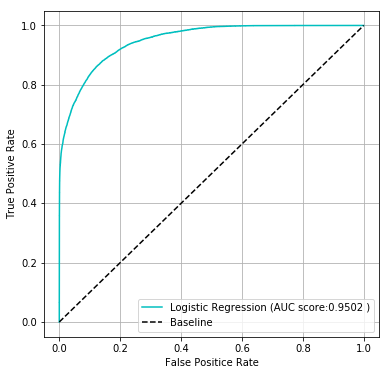

In [131]:
plot_roc_curve([LR],[Val_X_scaled],[Val_Y],["Logistic Regression"])

### Lets Look at which features were important

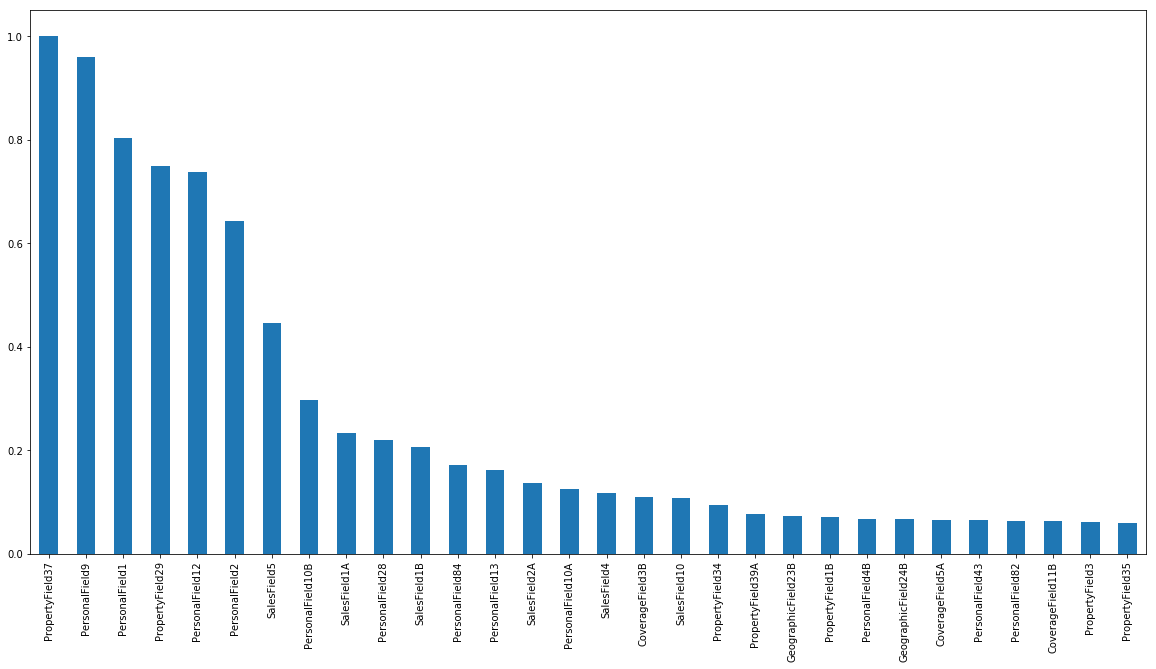

In [66]:
LR_importances= pd.Series(data=np.abs(LR.coef_[0])/max(np.abs(LR.coef_[0])),index=Train_X.columns)
LR_importances.sort_values(inplace=True,ascending=False)
LR_importances.ix[0:30].plot(kind='bar',figsize=(20,10))

## An Alternative algorithm: RandomForests

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
Pipe=Pipeline([("Scaler",StandardScaler()),("Rf",RandomForestClassifier(random_state=84))])
Param_grid_Rf={'Rf__n_estimators':[50],'Rf__min_samples_split':[50]}
best_Rf=GridSearchCV(Pipe,Param_grid_Rf,cv=2,verbose=1,n_jobs=-1,scoring='roc_auc')
best_Rf.fit(Train_X,Train_Y)
print best_Rf.best_params_,best_Rf.best_score_,

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   31.6s finished


{'Rf__min_samples_split': 50, 'Rf__n_estimators': 50} 0.955095959732


In [124]:
Val_Rf_pred= best_Rf.predict(Val_X)

In [125]:
get_basic_metrics(Val_Y,Val_Rf_pred)

 Raw Accuracy score: 0.915691297612
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.92      0.98      0.95     52965
          1       0.88      0.64      0.74     12224

avg / total       0.91      0.92      0.91     65189

CONFUSION MATRIX
   0     1
0 51879 1086
1 4410 7814


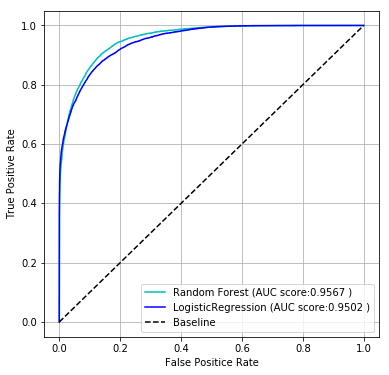

In [133]:
plot_roc_curve([best_Rf,LR],[Val_X,Val_X_scaled],[Val_Y]*2,["Random Forest","LogisticRegression"])

In [ ]:
best_Rf.best_estimator_.feature_importances_

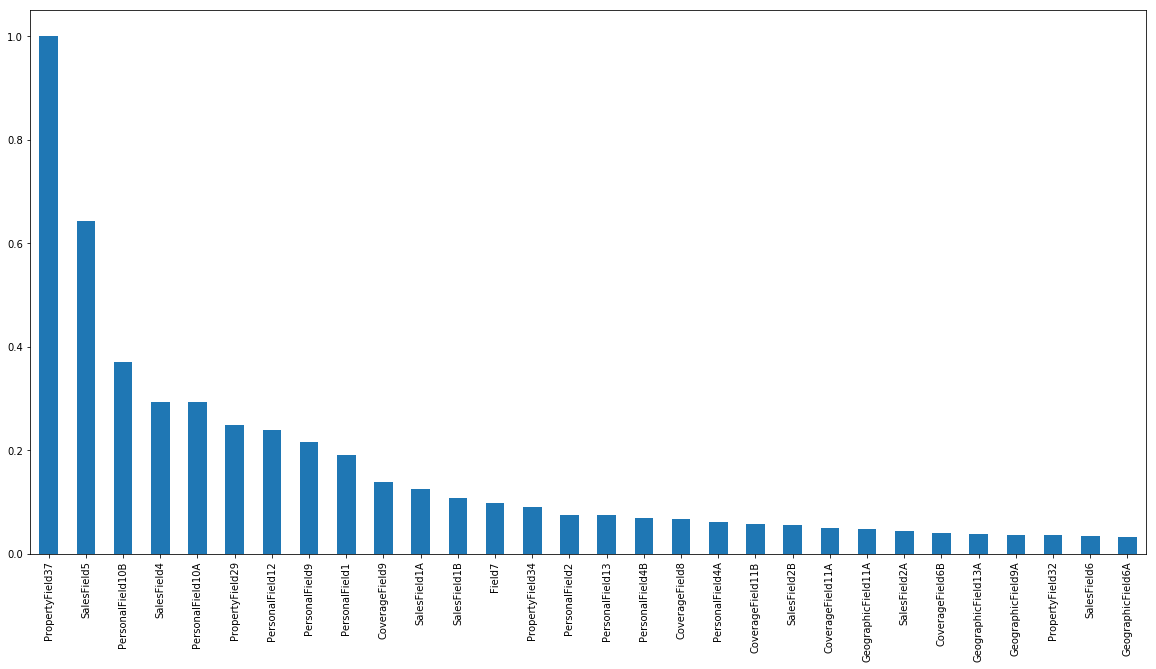

In [105]:
Rf_importances= pd.Series(data=(best_Rf.best_estimator_.feature_importances_)/max(best_Rf.best_estimator_.feature_importances_),index=Train_X.columns)
Rf_importances.sort_values(inplace=True,ascending=False)
Rf_importances.ix[0:30].plot(kind='bar',figsize=(20,10))

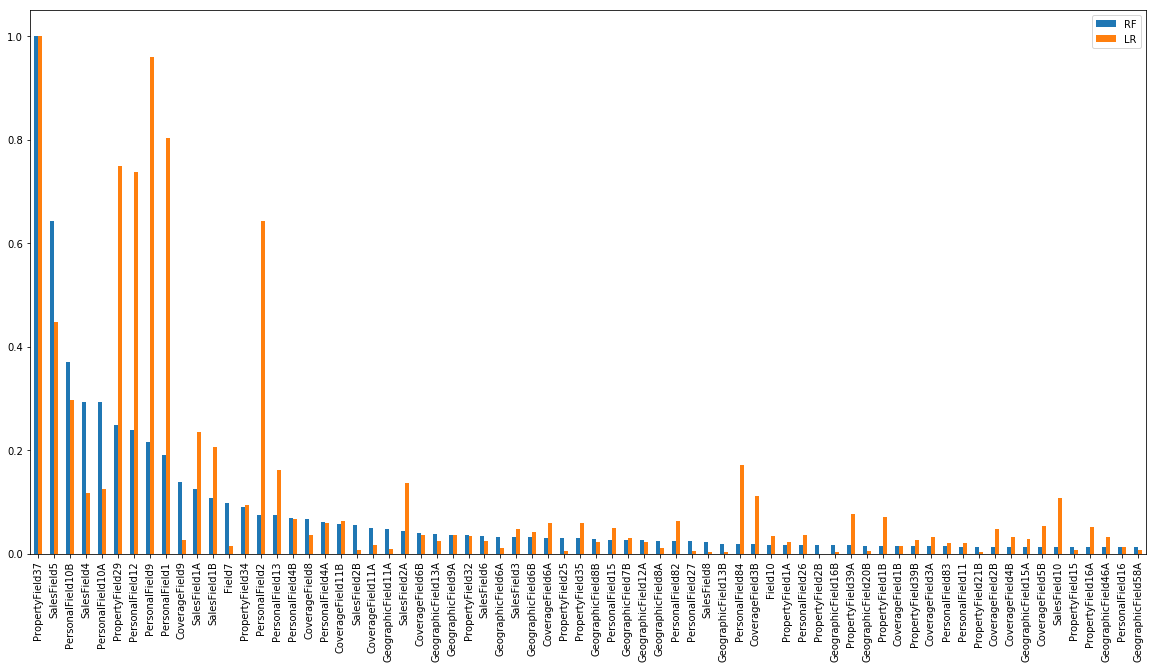

In [108]:
Imp_joined=pd.concat([Rf_importances,LR_importances],axis=1,keys=["RF","LR"])
Imp_joined.sort_values(by="RF",inplace=True,ascending=False)
Imp_joined.ix[0:70].plot(kind='bar',figsize=(20,10))

# Finally XGBOOST 

In [134]:
import xgboost as xg

In [135]:
clf = xg.XGBClassifier(n_estimators=25,
                        nthread=-1,
                        max_depth=10,
                        learning_rate=0.025,
                        silent=True,
                        subsample=0.8,
                        colsample_bytree=0.8)

xgb_model = clf.fit(Train_X, Train_Y, eval_metric="auc")
Val_pred_XG= clf.predict(Val_X)

In [136]:
get_basic_metrics(Val_Y,Val_pred_XG)

 Raw Accuracy score: 0.921581861971
CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.92      0.99      0.95     52965
          1       0.92      0.64      0.75     12224

avg / total       0.92      0.92      0.92     65189

CONFUSION MATRIX
   0     1
0 52241 724
1 4388 7836


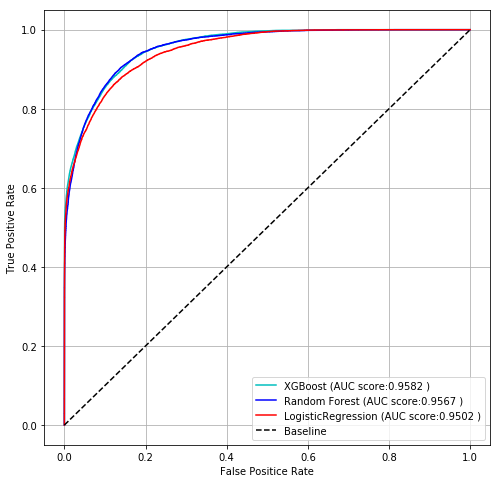

In [139]:
plot_roc_curve([clf,best_Rf,LR],[Val_X,Val_X,Val_X_scaled],[Val_Y]*3,["XGBoost","Random Forest","LogisticRegression"])

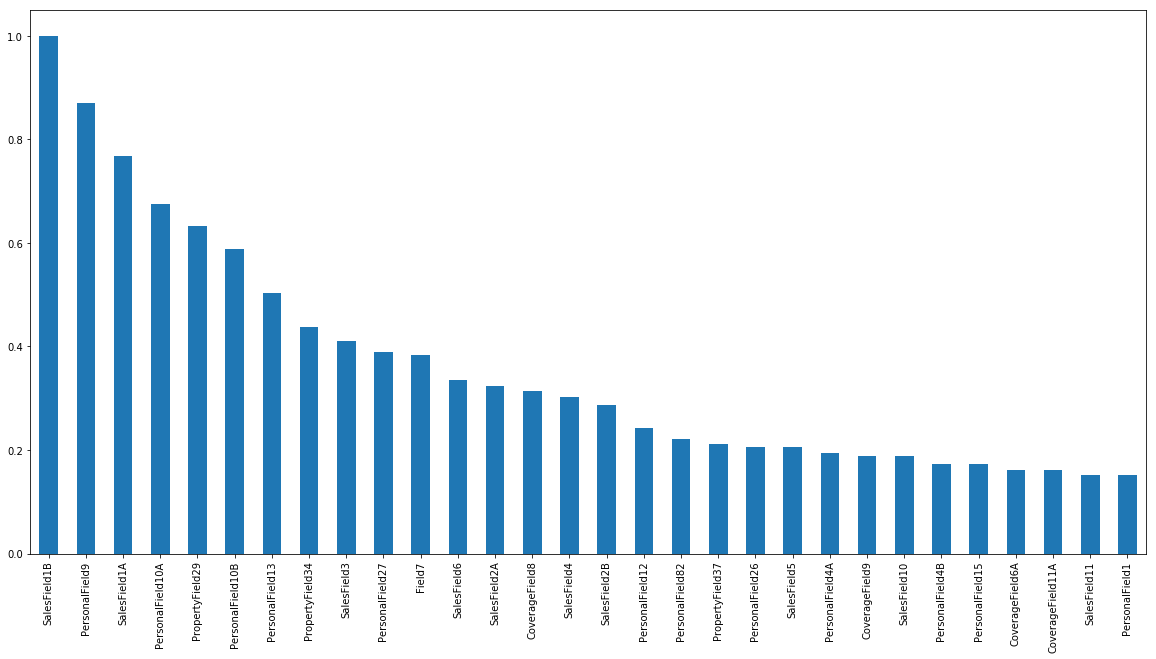

In [141]:
XG_importances= pd.Series(data=(clf.feature_importances_)/max(clf.feature_importances_),index=Train_X.columns)
XG_importances.sort_values(inplace=True,ascending=False)
XG_importances.ix[0:30].plot(kind='bar',figsize=(20,10))


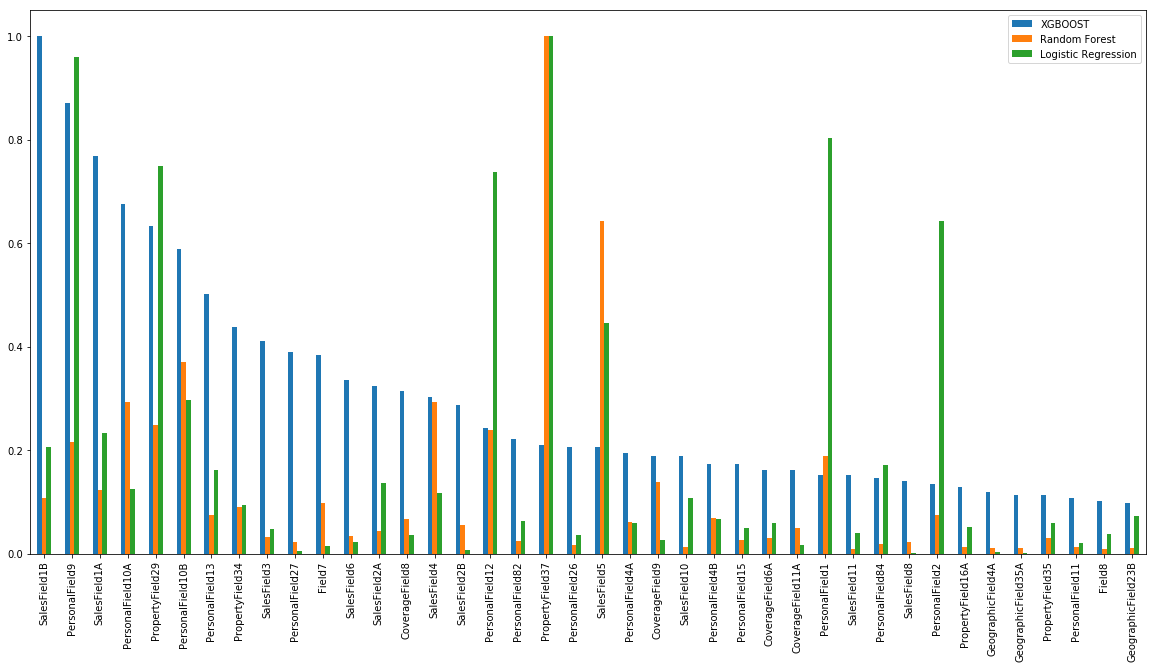

In [146]:
Imp_joined=pd.concat([XG_importances,Rf_importances,LR_importances],axis=1,keys=["XGBOOST","Random Forest","Logistic Regression"])
Imp_joined.sort_values(by="XGBOOST",inplace=True,ascending=False)
Imp_joined.ix[0:40].plot(kind='bar',figsize=(20,10))

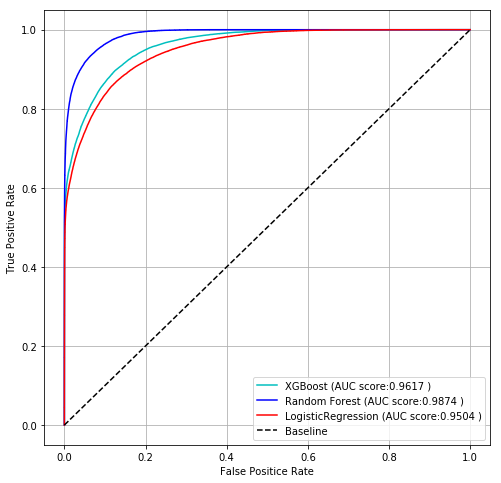

In [148]:
plot_roc_curve([clf,best_Rf,LR],[Train_X,Train_X,Train_X_scaled],[Train_Y]*3,["XGBoost","Random Forest","LogisticRegression"])

# Scratch

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
Train_X_pca=pca.fit_transform(Train_X_scaled)


In [35]:
np.sum(pca.explained_variance_ratio_)

0.59278079220290503

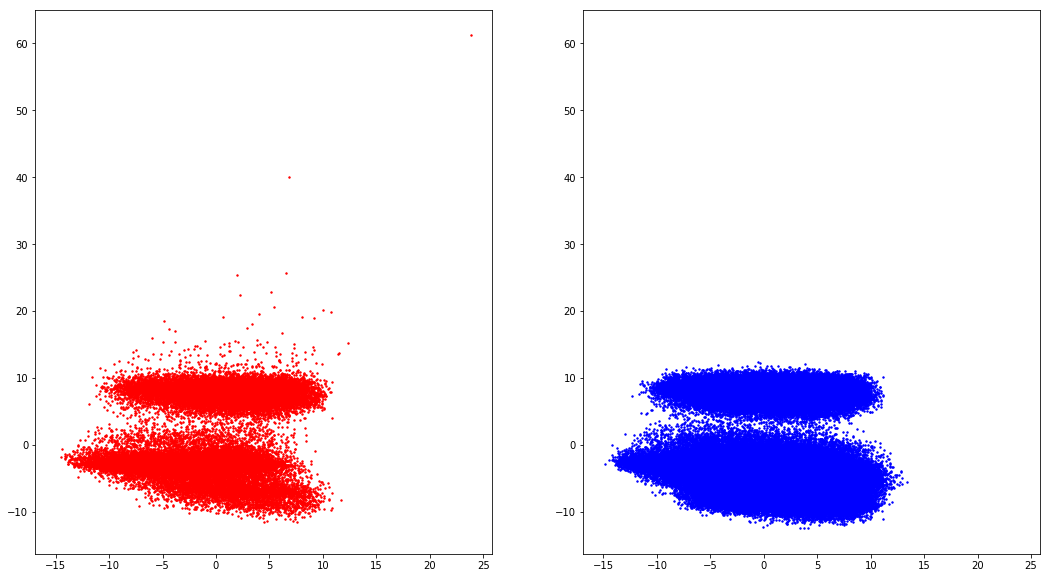

In [31]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(18,10))
ax1=plt.subplot(1,2,1)
plt.scatter(Train_X_pca[Train_Y==1][:,1],Train_X_pca[Train_Y==1][:,0],s=2.0,c='r',label="Positive")
ax2=plt.subplot(1,2,2,sharey=ax1,sharex=ax1)
plt.scatter(Train_X_pca[Train_Y==0][:,1],Train_X_pca[Train_Y==0][:,0],s=2.0,c='b',label="Negative")

In [118]:
print train_data["PropertyField37"][Y==0].value_counts()
print train_data["PropertyField37"][Y==1].value_counts()

1    157015
2     54844
Name: PropertyField37, dtype: int64
1    28961
2    19933
Name: PropertyField37, dtype: int64
